In [1]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
from numpy.linalg import eig
from collections import OrderedDict
import matplotlib.pyplot as plt

In [3]:
def zscore(m):
    return ((m.T-np.mean(m,axis=1))/np.std(m,axis=1)).T

def pca(matrix,shape):
    matrix = np.dot(matrix.T,matrix)/shape[0]
    values,vectors=eig(matrix)
    
    res = {values[i]: vectors[i] for i in range(len(values))}
    
    od=OrderedDict(sorted(res.items()))
  
    return od

def show_img(vector):
  img_data = vector.reshape((64,64))
  plt.imshow(img_data,cmap='gray')
  plt.show()

def find_alphas(data,base_faces):
  matrix=np.empty((len(data),len(base_faces)))
  for i in range(len(matrix)):
    for j in range(len(matrix[0])):
      matrix[i,j]=np.dot(data[i].T,base_faces[j])
  return matrix

def reconstruction(alphas,base_faces):
  
  for i in range(len(base_faces)):
    if(i==0):
      temp=base_faces[i]*alphas[i]
    else:
      temp+=base_faces[i]*alphas[i]
    
    #temp=zscore(temp.reshape((1,temp.shape[0]))).reshape(-1)
    #plt.subplot(5,5,i+1)    
  
  show_img(temp)

  #plt.show()

In [23]:
olivetti = fetch_olivetti_faces()

data = olivetti.images
shape=data.shape
print(shape)

data = zscore(data.reshape(shape[0],shape[1]*shape[2]))
base_faces_dict = pca(data,shape)

(400, 64, 64)


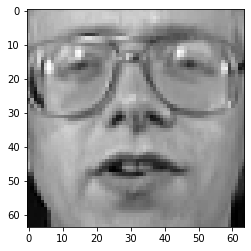

-3.1878789741313085e-07
1.0000001


In [24]:
show_img(data[10])
sum=0
for i in data[10]:
    sum+=i
print(sum/len(data[10]))
print(np.var(data[10]))

In [25]:
base_faces=[base_faces_dict[i] for i in list(base_faces_dict)[:3000]]

In [ ]:
for i in range(25):   
    show_img(base_faces[i])

[-0.36106426 -1.43512046  0.14220227 ... -1.3399961  -0.02006096
  0.37635559]
(400, 3000)


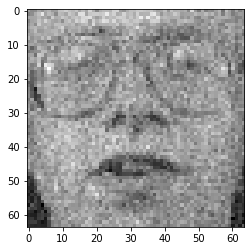

In [26]:
alphas = find_alphas(data,base_faces)
print(alphas[10])
print(alphas.shape)
number = int(input("Enter face number"))
reconstruction(alphas[number],base_faces)